In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Step 1: Create synthetic data
np.random.seed(42)
n_samples = 100

X1 = np.random.rand(n_samples)
X2 = 2 * X1 + np.random.normal(0, 0.01, size=n_samples)  # Highly correlated with X1
X3 = np.random.rand(n_samples)  # Independent

# Target: Linear combination + noise
y = 3 * X1 + 1.5 * X3 + np.random.normal(0, 0.1, size=n_samples)

# DataFrame for analysis
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
X = df[['X1', 'X2', 'X3']]
y = df['y']

# Step 2: Check VIF to detect multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF before removing multicollinearity:\n", vif_data)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 4: Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_multicollinearity = mean_squared_error(y_test, y_pred)
print(f"\nMSE with multicollinearity: {mse_with_multicollinearity:.4f}")

# Step 5: Remove X2 (highly collinear with X1)
X_reduced = df[['X1', 'X3']]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, random_state=0)

model_reduced = LinearRegression()
model_reduced.fit(X_train_red, y_train_red)
y_pred_red = model_reduced.predict(X_test_red)
mse_without_multicollinearity = mean_squared_error(y_test_red, y_pred_red)
print(f"MSE after removing multicollinearity: {mse_without_multicollinearity:.4f}")


VIF before removing multicollinearity:
   feature           VIF
0      X1  15353.072783
1      X2  15393.063496
2      X3      2.238342

MSE with multicollinearity: 0.0055
MSE after removing multicollinearity: 0.0057


VIF before removing multicollinearity:
   feature           VIF
0      X1  15353.072783
1      X2  15393.063496
2      X3      2.238342


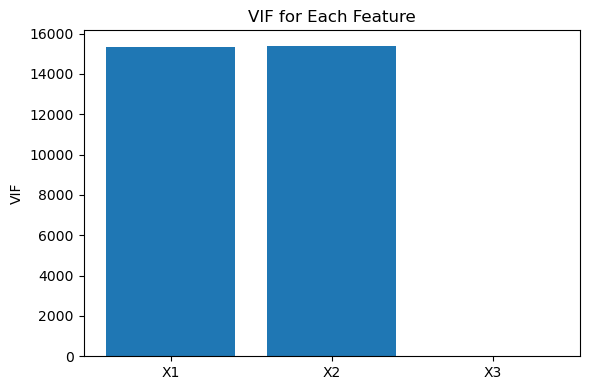


MSE with multicollinearity: 0.0055
MSE after removing multicollinearity: 0.0057


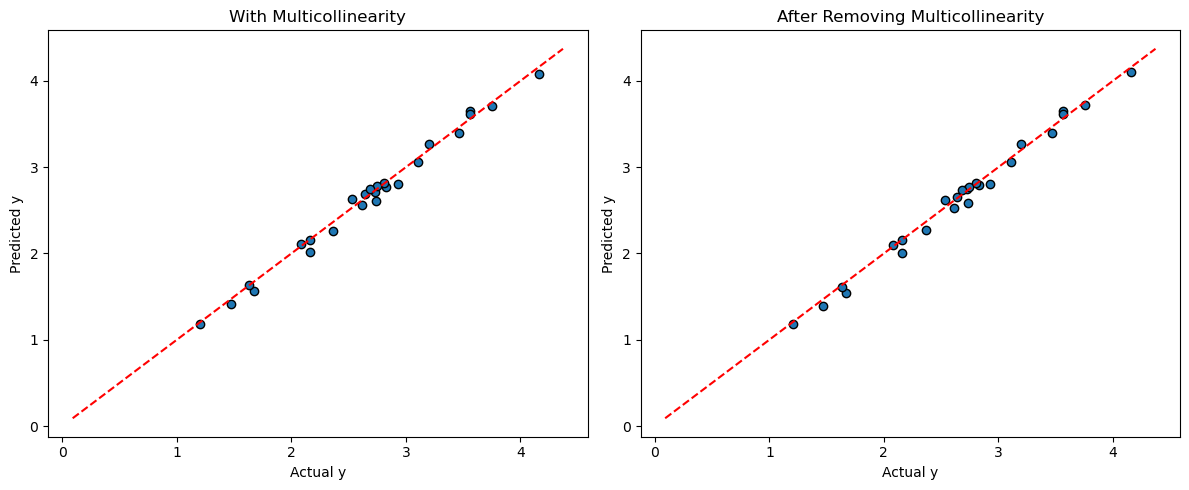

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Step 1: Create synthetic data
np.random.seed(42)
n_samples = 100

X1 = np.random.rand(n_samples)
X2 = 2 * X1 + np.random.normal(0, 0.01, size=n_samples)  # Highly correlated with X1
X3 = np.random.rand(n_samples)  # Independent

y = 3 * X1 + 1.5 * X3 + np.random.normal(0, 0.1, size=n_samples)

# DataFrame for analysis
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
X = df[['X1', 'X2', 'X3']]
y = df['y']

# Step 2: Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF before removing multicollinearity:\n", vif_data)

# VIF plot
plt.figure(figsize=(6, 4))
plt.bar(vif_data['feature'], vif_data['VIF'])
plt.title('VIF for Each Feature')
plt.ylabel('VIF')
plt.tight_layout()
plt.show()

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Model with multicollinearity
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with = mean_squared_error(y_test, y_pred)
print(f"\nMSE with multicollinearity: {mse_with:.4f}")

# Step 4: Remove multicollinearity
X_reduced = df[['X1', 'X3']]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, random_state=0)

model_reduced = LinearRegression()
model_reduced.fit(X_train_red, y_train_red)
y_pred_red = model_reduced.predict(X_test_red)
mse_without = mean_squared_error(y_test_red, y_pred_red)
print(f"MSE after removing multicollinearity: {mse_without:.4f}")

# Step 5: Prediction error comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("With Multicollinearity")

plt.subplot(1, 2, 2)
plt.scatter(y_test_red, y_pred_red, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("After Removing Multicollinearity")

plt.tight_layout()
plt.show()


In [3]:
print("Coefficients with multicollinearity:", model.coef_)
print("Coefficients after removing X2:", model_reduced.coef_)

Coefficients with multicollinearity: [ 6.62694058 -1.81677915  1.52176833]
Coefficients after removing X2: [3.00496775 1.51931869]
